<a href="https://colab.research.google.com/github/jbornilla/co2emissions/blob/main/MATH_2315_Lab_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Imports

In [1]:
# Import pandas, numpy, and matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# seaborn is a data visualization library built on matplotlib
import seaborn as sns 

# set the plotting style 
sns.set_style("whitegrid")

# Modeling
import statsmodels.formula.api as smf
import statsmodels.api as sm

## Lab introduction

We will be working with the IMDB movies data set from the vega data sets. We will ask the following questions:

1.  Do movies that are more expensive to produce make more money worldwide?
2.  Do movie ratings (IMDB or Rotten Tomatoes) help predict the worldwide gross of a movie?




## Import and set up the data set

### Load the data



In [3]:
#This code loads the data into the notebook from an outside source.
from vega_datasets import data

Create a Pandas data frame for the movies data set.

In [4]:
#This code uses the imported data and converts it into  a data frame using pandas.
df = data.movies()

For simplicity, remove any rows that have NaN's from the data frame.

In [5]:
#This code wil remove NaN's or any empty values.
df = df.dropna()

## Explore the data set

##### $\rightarrow$ Display the head of the data frame

##### Solution

In [6]:
#This code displays the head of the data frame which allows us to see the titles of the columns that are included and what the first couple of rows would look like.
df.head()

,Title,US_Gross,Worldwide_Gross,US_DVD_Sales,Production_Budget,Release_Date,MPAA_Rating,Running_Time_min,Distributor,Source,Major_Genre,Creative_Type,Director,Rotten_Tomatoes_Rating,IMDB_Rating,IMDB_Votes
1064,12 Rounds,12234694.0,18184083.0,8283859.0,20000000.0,Mar 27 2009,PG-13,108.0,20th Century Fox,Original Screenplay,Action,Contemporary Fiction,Renny Harlin,28.0,5.4,8914.0
1074,2012,166112167.0,766812167.0,50736023.0,200000000.0,Nov 13 2009,PG-13,158.0,Sony Pictures,Original Screenplay,Action,Science Fiction,Roland Emmerich,39.0,6.2,396.0
1090,300,210614939.0,456068181.0,261252400.0,60000000.0,Mar 09 2007,R,117.0,Warner Bros.,Based on Comic/Graphic Novel,Action,Historical Fiction,Zack Snyder,60.0,7.8,235508.0
1095,3:10 to Yuma,53606916.0,69791889.0,51359371.0,48000000.0,Sep 02 2007,R,117.0,Lionsgate,Remake,Western,Historical Fiction,James Mangold,89.0,7.9,98355.0
1107,88 Minutes,16930884.0,32955399.0,11385055.0,30000000.0,Apr 18 2008,R,106.0,Sony Pictures,Original Screenplay,Thriller/Suspense,Contemporary Fiction,Jon Avnet,5.0,5.9,31205.0


## Exploratory data analysis

##### $\rightarrow$ Make a pair plot to explore relationships between the numerical variables in the data set. 

##### Solution

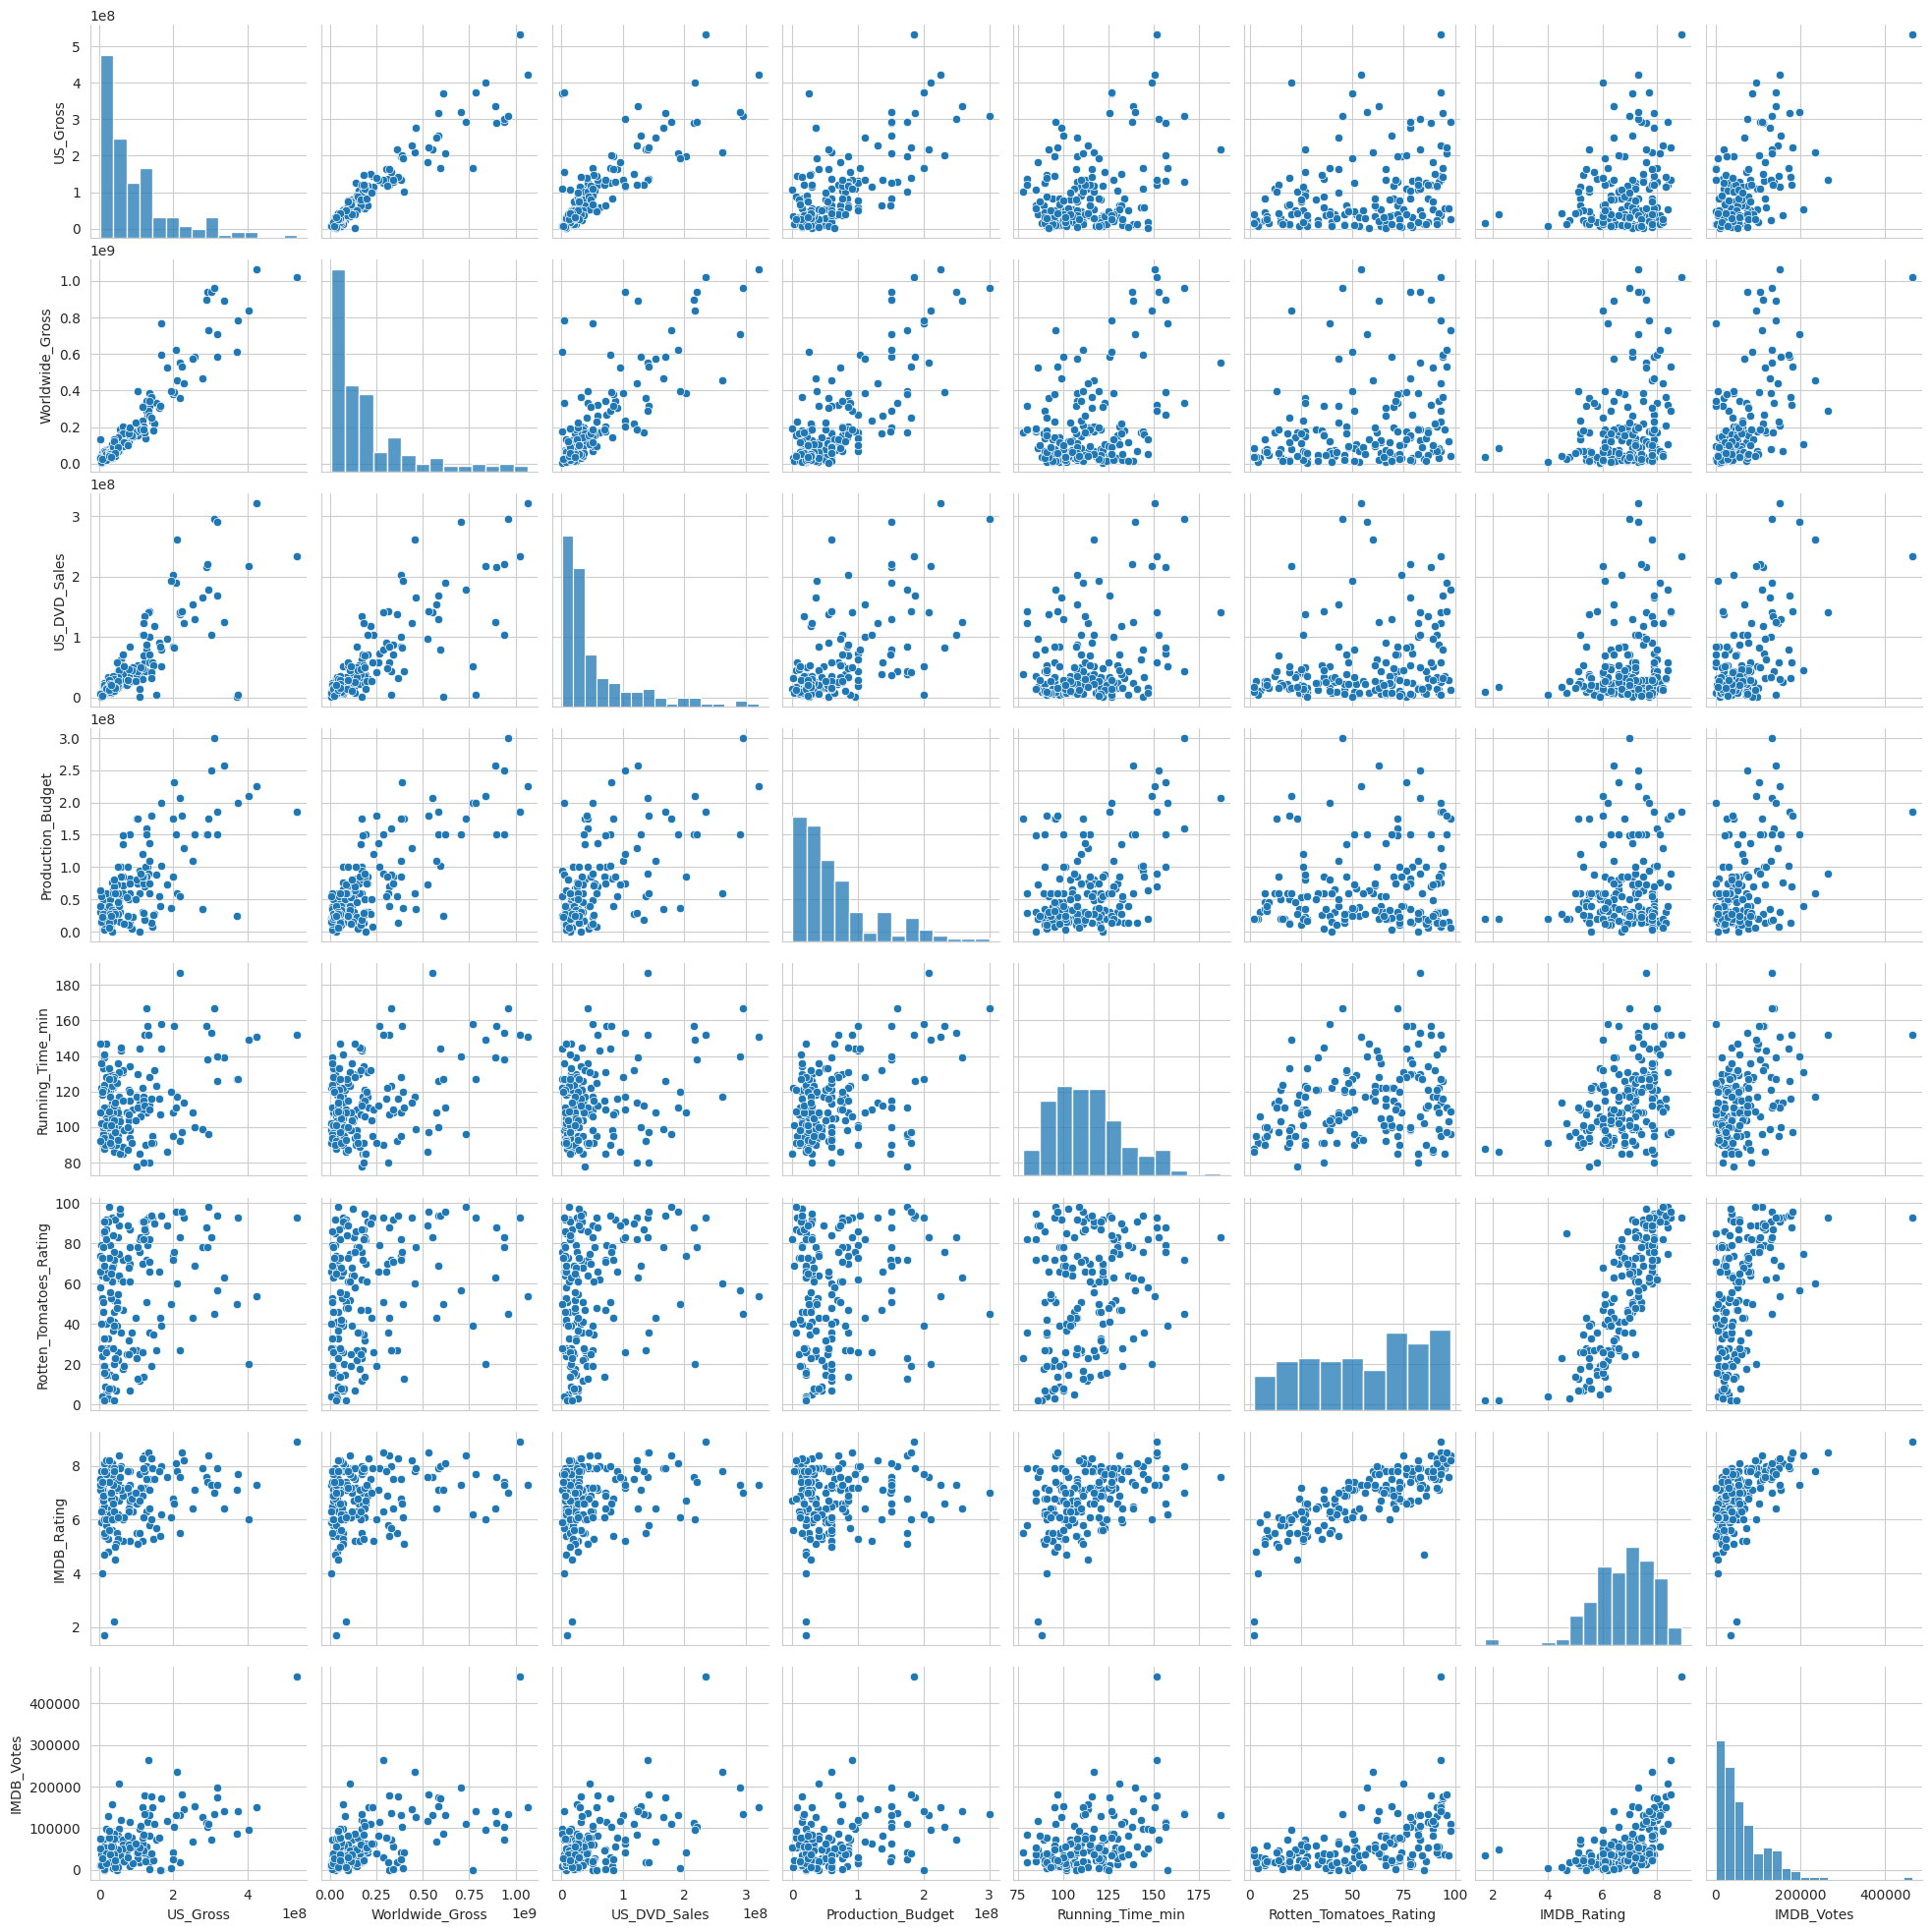

In [7]:
#This code uses the seaborn library which allows the function of graphing pair plots of the numerical variables included in the data set.
sns.pairplot(df)

The code above will display the pair plots where each set of data is plotted in relation to another. This allows us to see the trends and correlations that specific numerical vairables may have with each other. 

##### $\rightarrow$ Plot the correlation matrix to explore relationships between the numerical variables.

##### Solution

In [ ]:
#This code is meant to display the correlation matrix in its simplest form as just a table of values.
df.corr()

<ipython-input-9-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,US_Gross,Worldwide_Gross,US_DVD_Sales,Production_Budget,Running_Time_min,Rotten_Tomatoes_Rating,IMDB_Rating,IMDB_Votes
US_Gross,1.000000,0.945884,0.805957,0.716107,0.324815,0.272995,0.249241,0.626820
Worldwide_Gross,0.945884,1.000000,0.805460,0.786412,0.415510,0.273585,0.253299,0.589141
US_DVD_Sales,0.805957,0.805460,1.000000,0.603094,0.299024,0.237974,0.242352,0.557508
Production_Budget,0.716107,0.786412,0.603094,1.000000,0.414008,0.138919,0.121940,0.403616
Running_Time_min,0.324815,0.415510,0.299024,0.414008,1.000000,0.266890,0.402948,0.413505
Rotten_Tomatoes_Rating,0.272995,0.273585,0.237974,0.138919,0.266890,1.000000,0.799496,0.493600
IMDB_Rating,0.249241,0.253299,0.242352,0.121940,0.402948,0.799496,1.000000,0.560185
IMDB_Votes,0.626820,0.589141,0.557508,0.403616,0.413505,0.493600,0.560185,1.000000


This code displays the correlation of each of the plots above which is also known as the correlation matrix. Although the correlation of some of the numerical variables can be deduced just from the plots, this table provides actual values.

<ipython-input-10-f8cf76c3e72e>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cmatrix = df.corr()


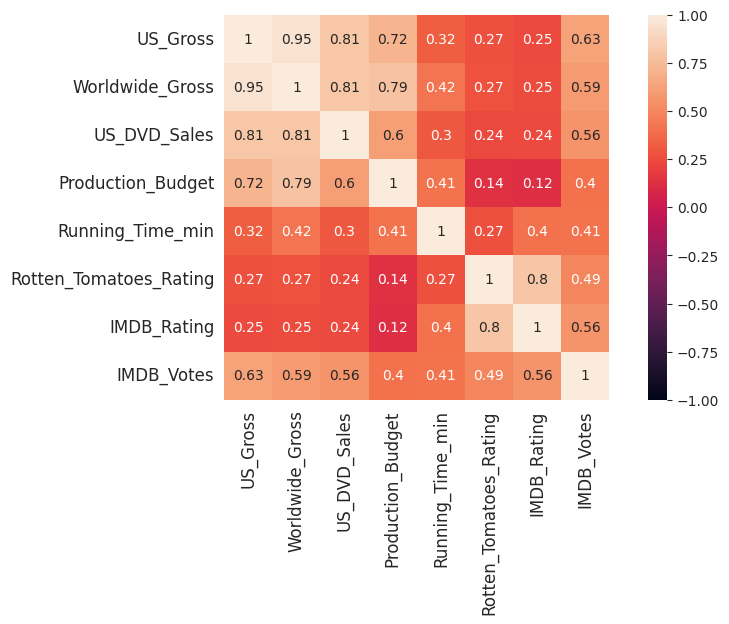

In [ ]:
#The code here prompts another version of the correlation matrix called a heatmap. This is from the seaborn library and displays the correlation of numerical variables based on a color gradient system. 
cmatrix = df.corr()
plt.figure(figsize=(10,5))
sns.heatmap(cmatrix, vmax=1, vmin=-1, square=True, annot=True)
plt.tick_params(labelsize=12);

This is also the correlation matrix, but in the form of a plot where the hue of the box corresponds to the correlation of the two numerical values.

## Modeling

### Worldwide gross and production budget

##### $\rightarrow$ Complete the following:

1.  Make a scatter plot of the production budget and worldwide gross of the movie. Describe the relationship.

2.  Perform a regression analysis predicting worldwide gross from production budget. 

    a. Use graphical and numerical methods to assess the fit of a simple linear regression model.
    
    b. Determine whether a quadratic regression model is better than a simple linear regression model.

### Solution

Part 1.

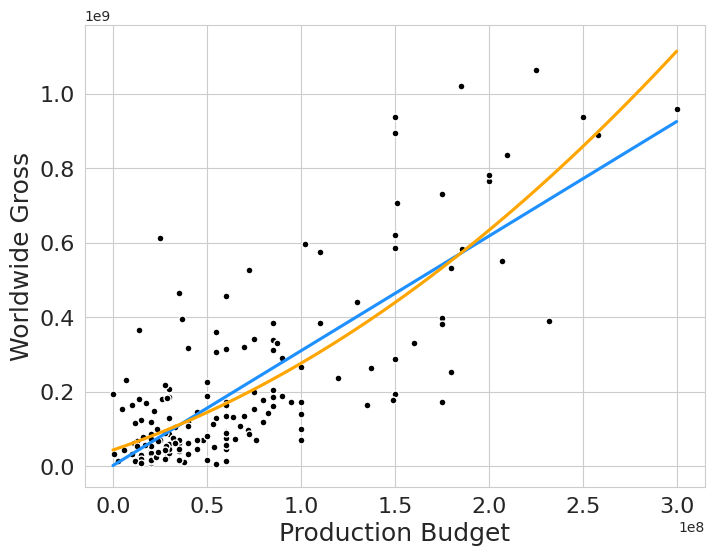

In [ ]:
#This code graphs a scatter plot of the production budget and worldwide gross data along with linear and quadratic regression lines to help visually asses the fit of the models. 
#Scatter Plot
plt.figure(figsize=(8,6))
plt.plot(df['Production_Budget'], df['Worldwide_Gross'], 'ko', ms=5, mec='w')
#Regression Line Analysis
sns.regplot(x='Production_Budget', y='Worldwide_Gross', color='dodgerblue', data=df, ci=False, scatter=False)
sns.regplot(x='Production_Budget', y='Worldwide_Gross', color='orange', data = df, ci = False, scatter = False, order=2)
plt.xlabel('Production Budget', fontsize=18)
plt.ylabel('Worldwide Gross', fontsize=18)
plt.tick_params(labelsize=16);

In this plot, the production budget is set as the x variable with the worldwide gross as the y variable. With this relationship setup, it is easy to asses how the production budget affects the worldwide gross of a movie and if more budget means better outcomes. Although it can not be completely confirmed that a higher budget will ensure a higher gross, it can be said that these two variables hold influence over each other. The correlation matrix revealed that these two have a correlation value of 0.79 which is relatively high in comaprison to others. 
In additon, the actual plot of the two data sets insinuates that there is a somewhat positive relationship between the two. As the budget increases, the worldwide gross does as well. Looking at the points briefly, one can also assume that the relationship between these two variables is one of positive linearity. 

Part 2.

A. The regression models included on the scatter plot above serve as the graphical methods of assesing the fit of a linear model.

In [ ]:
#This code displays a data summary that includes the R-squared value reflecting the linear regression model fit for the worldwide gross and the production budget data.
# Data Summary
budgetxgross = smf.ols(formula='Worldwide_Gross~Production_Budget', data=df).fit()
print(budgetxgross.summary())

                            OLS Regression Results                            
Dep. Variable:        Worldwide_Gross   R-squared:                       0.618
Model:                            OLS   Adj. R-squared:                  0.616
Method:                 Least Squares   F-statistic:                     278.8
Date:                Mon, 08 May 2023   Prob (F-statistic):           7.95e-38
Time:                        06:54:19   Log-Likelihood:                -3516.7
No. Observations:                 174   AIC:                             7037.
Df Residuals:                     172   BIC:                             7044.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept          1.642e+06   1.66e+0

The summary above displays the information based on the relationship held between the production budget and the worldwide gross of movies. In the way this summary was coded, the R-squared value is meant to asses the fit of a positive linear relationship. It resulted in an R-value of 0.618. This fits because it could be seen that there is a  trend of the points increasing in the y direction as the x value increases. With that being said however, there were other outliers and straggler points that had potentially lowered the R-squared value.

B. 

In [ ]:
#This code displays a data summary that includes the R-squared value reflecting the quadratic regression model fit for the worldwide gross and the production budget data.
budgetxgross2 = smf.ols(formula='Worldwide_Gross~Production_Budget+I(Production_Budget**2)', data=df).fit()
print(budgetxgross2.summary())

                            OLS Regression Results                            
Dep. Variable:        Worldwide_Gross   R-squared:                       0.625
Model:                            OLS   Adj. R-squared:                  0.623
Method:                 Least Squares   F-statistic:                     286.4
Date:                Mon, 08 May 2023   Prob (F-statistic):           1.88e-38
Time:                        07:36:44   Log-Likelihood:                -3515.3
No. Observations:                 174   AIC:                             7035.
Df Residuals:                     172   BIC:                             7041.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept             

This summary displays the same information that the previous code prompts, except this relationship is being analyzed based on a quadratic regression model. The production budget was squared to check if the trend of the points had fit better than the positive linear model. Looking at the R-squared value provided, it can be seen that the quadratic regression model seems to fit the trend of the points more than the linear model did. This R-squared value returned as 0.625 which is greater than the 0.618 prior. With that being said, the quadratic model is signifcant, but it does not improve the fit by that much as many of the points are clustered in one section while the rest seemed relatively spread out. 

### Incorporating movie ratings

##### $\rightarrow$ Complete the following:

1.  Perform a regression analysis predicting worldwide gross from production budget and movie ratings from Rotten Tomatoes and IMDB.

    a. Does the addition of either the Rotten Tomatoes or IMDB ratings to the model containing production budget improve the prediction of worldwide gross?
    
    b. Is it useful to include both Rotten Tomatoes and IMDB ratings as predictors in the model?

### Solution

In [ ]:
#This code displays the column titles and the first couple of rows within the data set.
df.head()

,Title,US_Gross,Worldwide_Gross,US_DVD_Sales,Production_Budget,Release_Date,MPAA_Rating,Running_Time_min,Distributor,Source,Major_Genre,Creative_Type,Director,Rotten_Tomatoes_Rating,IMDB_Rating,IMDB_Votes
1064,12 Rounds,12234694.0,18184083.0,8283859.0,20000000.0,Mar 27 2009,PG-13,108.0,20th Century Fox,Original Screenplay,Action,Contemporary Fiction,Renny Harlin,28.0,5.4,8914.0
1074,2012,166112167.0,766812167.0,50736023.0,200000000.0,Nov 13 2009,PG-13,158.0,Sony Pictures,Original Screenplay,Action,Science Fiction,Roland Emmerich,39.0,6.2,396.0
1090,300,210614939.0,456068181.0,261252400.0,60000000.0,Mar 09 2007,R,117.0,Warner Bros.,Based on Comic/Graphic Novel,Action,Historical Fiction,Zack Snyder,60.0,7.8,235508.0
1095,3:10 to Yuma,53606916.0,69791889.0,51359371.0,48000000.0,Sep 02 2007,R,117.0,Lionsgate,Remake,Western,Historical Fiction,James Mangold,89.0,7.9,98355.0
1107,88 Minutes,16930884.0,32955399.0,11385055.0,30000000.0,Apr 18 2008,R,106.0,Sony Pictures,Original Screenplay,Thriller/Suspense,Contemporary Fiction,Jon Avnet,5.0,5.9,31205.0


Displaying the head of the data frame was helpful in accessing each column title, making it easier to type out the code.

In [ ]:
#This code displays a data summary that includes the R-squared value reflecting the linear regression model fit for the worldwide gross along with the production budget, Rotten Tomatoes ratings and IMDB ratings..
model=smf.ols(formula='Worldwide_Gross~Production_Budget+Rotten_Tomatoes_Rating+IMDB_Rating', data=df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:        Worldwide_Gross   R-squared:                       0.648
Model:                            OLS   Adj. R-squared:                  0.642
Method:                 Least Squares   F-statistic:                     104.3
Date:                Mon, 08 May 2023   Prob (F-statistic):           2.47e-38
Time:                        07:40:54   Log-Likelihood:                -3509.8
No. Observations:                 174   AIC:                             7028.
Df Residuals:                     170   BIC:                             7040.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept              -1.49

A. 
In this model summary, the data being analyzed is the worldwide gross values versus the production budget, Rotten Tomato ratings and the IMDB ratings. Together, these had produced a much larger R-squared value, improving the fit of the positive linear regression model from before. A value of 0.618 was the result of the fit of the model onto the points prior, but it then increased to 0.648. Now, having a larger R-squared value means that the linear model proves to be a better fit than it did before, therefore also making it a better predictor of the worldwide gross of a movie. 

Looking at the code below will also show that the Rotten Tomato ratings and the IMDB rating separately also increase the R-squared value. This means that they do improve the prediction of the worldwide gross of a movie. 

In [ ]:
#This code is similar to the previous section, but now it just analyzes the Rotten Tomato ratings with the budget and gross.
model1=smf.ols(formula='Worldwide_Gross~Production_Budget+Rotten_Tomatoes_Rating', data=df).fit()
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:        Worldwide_Gross   R-squared:                       0.646
Model:                            OLS   Adj. R-squared:                  0.642
Method:                 Least Squares   F-statistic:                     156.0
Date:                Mon, 08 May 2023   Prob (F-statistic):           2.76e-39
Time:                        07:42:30   Log-Likelihood:                -3510.2
No. Observations:                 174   AIC:                             7026.
Df Residuals:                     171   BIC:                             7036.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept              -7.08

In [ ]:
#This code is the same as previous except it now has IMDB ratings instead of the Rotten Tomato ratings.
model2=smf.ols(formula='Worldwide_Gross~Production_Budget+IMDB_Rating', data=df).fit()
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:        Worldwide_Gross   R-squared:                       0.644
Model:                            OLS   Adj. R-squared:                  0.639
Method:                 Least Squares   F-statistic:                     154.4
Date:                Mon, 08 May 2023   Prob (F-statistic):           4.91e-39
Time:                        07:42:53   Log-Likelihood:                -3510.8
No. Observations:                 174   AIC:                             7028.
Df Residuals:                     171   BIC:                             7037.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept         -2.267e+08   6.77e+0

B. 
Looking at the model summaries that only have the Rotten Tomato ratings, only the IMDB ratings, or both, we can see that the R-squared values will remain to be much higher than the 0.618 value that was produced with just the production budget. This means that both ratings being included as predictors for the model proved to be useful as they increased the likelihood of the model being able to fit the given points. 

With that being said, the addition of the Rotten Tomato ratings and the IMDB ratings both proved to be useful as they helped improve the prediction of the worldwide gross by increasing the fit of the model onto the points plotted. 